In [1]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [2]:
#MODULE NAME
import os
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import subprocess
import snappy
import imageio
import rasterio as rio
import rasterstats as rs
import rasterio.plot 
from glob import iglob
import geopandas as gpd
from pyspatialml import Raster
import seaborn as sns
from rasterio.plot import show
get_ipython().run_line_magic('matplotlib', 'inline')
#from osgeo import gdal
import prosail
from prosail import spectral_lib
import numpy as np
import numpy.matlib
import numpy as np
from numpy.random import seed
from numpy.random import rand
import numpy.matlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

In [3]:
dataframe = r"C:\Users\bongo\OneDrive\Desktop\Boostraping\PLSR\dataset.xlsx"
df = pd.read_excel(dataframe)
df.shape

(160, 2102)

In [4]:
measured_y = df.iloc[:,0]

In [5]:
measured_X = df.iloc[:, 51:112]

In [6]:
np.random.seed(45)
krange= 1000
n= 1.1
chloro= 20 + rand(krange)*80
caroten= 2 + rand(krange)*10
brown= 0.1 
EWT= 0.2
LMA=  0.001 + rand(krange)*0.016

In [7]:
rho = np.zeros((krange,2102)) #made it 2102 instaed of 2101 because i included chlorophll, carotenoid, water content and dry matter
for i in range(krange):
    wl, rho[i,0:2101], tau = prosail.run_prospect(n, chloro[i], caroten[i], brown, EWT, LMA[i], prospect_version='5')
    rho[i,-1]=caroten[i]

In [8]:
wl = range(400, 2502) 
LUT = pd.DataFrame(rho, columns=list(wl))
LUT = LUT.rename(columns = {2501: 'caroten'})

In [9]:
simulated_X = LUT.iloc[:, 50:111]

In [10]:
simulated_y = LUT.iloc[:, -1]

In [32]:
# Fit and check MSE before regularisation
# YOUR CODE HERE
reg = MLPRegressor(max_iter=6000, hidden_layer_sizes=(5,5), random_state=1)
reg.fit(simulated_X, simulated_y)

# Predict
# YOUR CODE HERE
y_pred = reg.predict(measured_X)

# MSE before regularisation
#mean_squared_error(y_pred, y_test)
# YOUR CODE HERE

0.7410210727492132


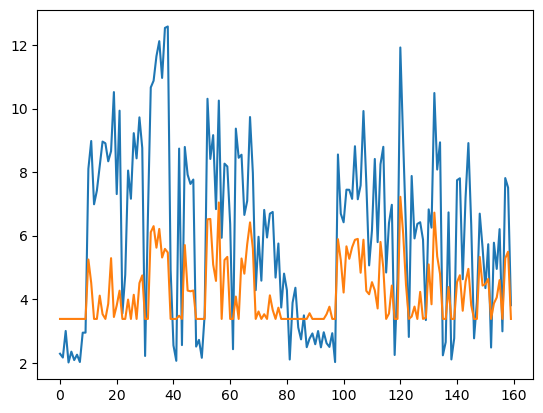

In [18]:
plt.plot(measured_y)
plt.plot(y_pred)
print(np.corrcoef(measured_y, y_pred)[0,1])

In [27]:
y_pred = pd.DataFrame(y_pred, columns = ['caroten'])
carot = pd.concat([measured_y, y_pred], axis = 1)

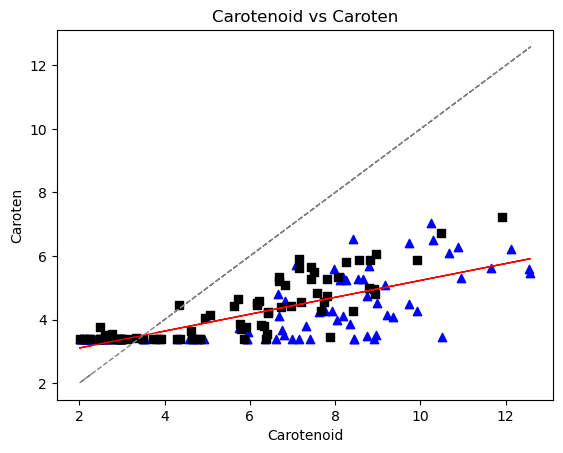

In [28]:

# Fit a linear regression line
a, b = np.polyfit(carot['carotenoid'], carot['caroten'], deg=1)

# Create the scatter plot with different shapes and colors for the two datasets
savanna_idx = range(0, 78)
tropical_idx = range(78, 160)

plt.scatter(carot['carotenoid'][savanna_idx], carot['caroten'][savanna_idx], color='blue', marker='^', label='Savanna')
plt.scatter(carot['carotenoid'][tropical_idx], carot['caroten'][tropical_idx], color='black', marker='s', label='Tropical Forest')

# Plot the linear regression line
plt.plot(carot['carotenoid'], a*carot['carotenoid']+b, color='red', linestyle='-', linewidth=1)

# Add the 1:1 line
plt.plot(carot['carotenoid'], carot['carotenoid'], color='gray', linestyle='--', linewidth=1)

# Add legend
#plt.legend()

# Add labels and title
plt.xlabel('Carotenoid')
plt.ylabel('Caroten')
plt.title('Carotenoid vs Caroten')
plt.show()

In [35]:
a, b = np.polyfit(carot['carotenoid'], carot['caroten'], deg=1)

In [36]:
ax1 = carot['carotenoid']
ax2 = carot['caroten']

In [37]:
corr_matrix = numpy.corrcoef(ax1, ax2)
corr = corr_matrix[0,1]
R_sq = corr**2
print(R_sq)

0.5491122302583948


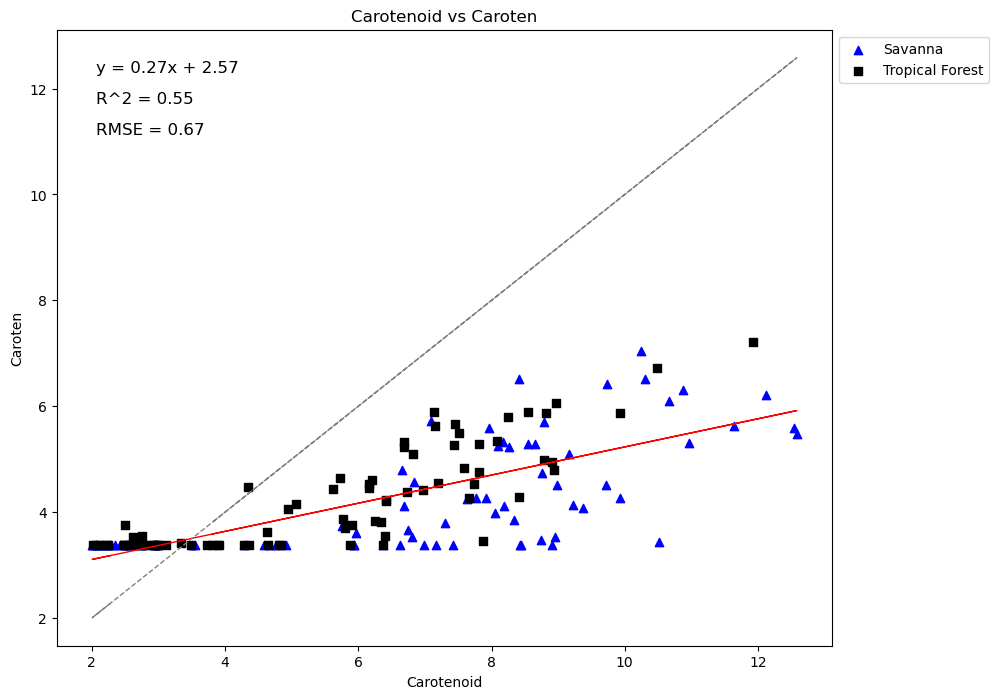

In [42]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Fit a linear regression model
model = LinearRegression()
model.fit(carot['carotenoid'].values.reshape(-1, 1), carot['caroten'])

# Calculate the regression coefficients, r-squared, and RMSE
a = model.coef_[0]
b = model.intercept_
r2 = r2_score(carot['caroten'], model.predict(carot['carotenoid'].values.reshape(-1, 1)))
rmse = np.sqrt(mean_squared_error(carot['caroten'], model.predict(carot['carotenoid'].values.reshape(-1, 1))))

# Create the scatter plot with different shapes and colors for the two datasets
savanna_idx = range(0, 78)
tropical_idx = range(78, 160)

plt.figure(figsize=(10, 8))
plt.scatter(carot['carotenoid'][savanna_idx], carot['caroten'][savanna_idx], color='blue', marker='^', label='Savanna')
plt.scatter(carot['carotenoid'][tropical_idx], carot['caroten'][tropical_idx], color='black', marker='s', label='Tropical Forest')

# Plot the linear regression line
plt.plot(carot['carotenoid'], a*carot['carotenoid']+b, color='red', linestyle='-', linewidth=1)

# Add the 1:1 line
plt.plot(carot['carotenoid'], carot['carotenoid'], color='gray', linestyle='--', linewidth=1)

# Add legend and annotations
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.text(0.05, 0.95, f'y = {a:.2f}x + {b:.2f}', transform=plt.gca().transAxes, va='top', fontsize=12)
plt.text(0.05, 0.90, f'R^2 = {r2:.2f}', transform=plt.gca().transAxes, va='top', fontsize=12)
plt.text(0.05, 0.85, f'RMSE = {rmse:.2f}', transform=plt.gca().transAxes, va='top', fontsize=12)

# Add labels and title
plt.xlabel('Carotenoid')
plt.ylabel('Caroten')
plt.title('Carotenoid vs Caroten')
plt.show()